# 03-1 k-최근접 이웃 회귀

### k-최근접 이웃 회귀
- 지도 학습 알고리즘은 크게 분류와 회귀(regression)로 나뉩니다.
- 회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제입니다.
- k-최근접 이웃 회귀는 가장 가까운 이웃 샘플을 찾고 이 샘플들의 타깃값을 평균하여 예측으로 삼습니다.
    - ex) 이웃한 샘플의 타깃값이 100, 80, 60이고 이를 평균하면 샘플의 예측 타깃값은 80이 됩니다.

### 데이터 준비
- http://bit.ly/perch_data

In [1]:
# 농어의 길이와 무게 데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
len(perch_length), len(perch_weight)

(56, 56)

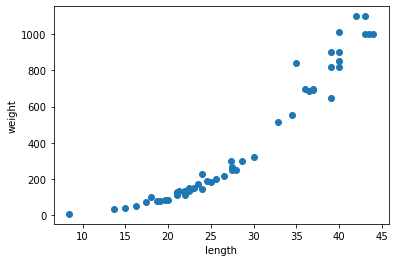

In [3]:
# 데이터의 어떤 형태를 띠고 있는지 산점도를 그려보기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)

In [5]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [7]:
test_array = test_array.reshape(2, 3) # 크기가 맞지 않아서 Error!!!

ValueError: cannot reshape array of size 4 into shape (2,3)

In [8]:
# 2차원 배열로 바꾸기
train_input= train_input.reshape(-1, 1) # -1을 지정하면 나머지 원소 개수로 모두 
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [10]:
print(knr.score(test_input, test_target))
# 0 ~ 1사이의 값으로 1에 가까울수록 잘 예측하고 있다고 판단

0.992809406101064


In [11]:
# mean_absolute_error(절대값 오차)
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 결과에서 예측이 평균적으로 19G 정도 타깃값과 다르다는 것을 알 수 있다.

19.157142857142862


### 과대적합 vs 과소적합
- 과대적합은 훈련 세트에서 점수가 굉장히 좋았는데 테스트 점수에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합되었다고 말합니다.
- 과소적합은 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우를 말합니다.

In [12]:
print(knr.score(train_input, train_target))
# 앞서 구한 test set으로 결정계수가 훈련 데이터의 결정계수보다 높게 나타난다???
# 보통 훈련 세트의 점수가 조금 더 높게 나옵니다. 왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야하기떄문에
# 과소적합일 경우 모델을 조금더 복잡하게 만들면 된다.

0.9698823289099254


In [13]:
# 더 복잡한 모델을 만들기 위해 n을 줄이자!!
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [14]:
print(knr.score(test_input, test_target))
# 훈련 세트의 점수보다 낮아졌으므로 과소적합이 해결된 것을 확인!!!

0.9746459963987609


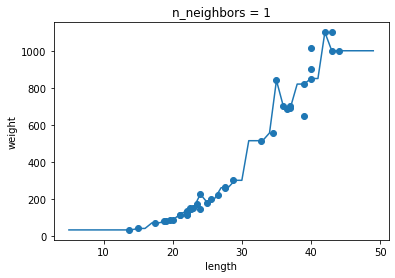

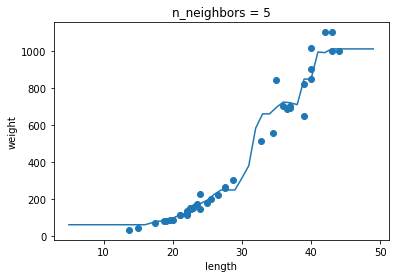

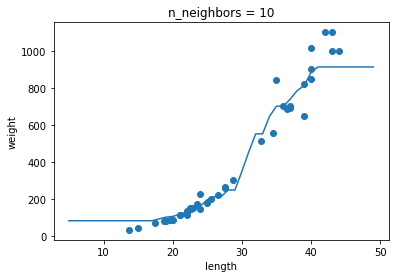

In [15]:
# 이웃의 개수가 커짐에 따라 모형이 덜 복잡해지는 것을 시각화 해보자
knr = KNeighborsRegressor()
x = np.arange(5, 50).reshape(-1, 1) 
# x는 농어의 길이로 우리데이터 기준으로 넉넉하게 잡음
# 우리가 가지고 있는 데이터의 범위를 초가하면 일정한 값을 예측하는 것을 확인!! 문제점!!!

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

### 핵심 패키지와 함수

#### scikit - learn
- KNeighborsRegressor는 k-최근접 이웃 회귀 모델을 만드는 사이킷런 클래스입니다.
    - n_neighbors 매개변수로 이웃의 개수를 지정합니다. 기본값은 5입니다.
- mean_absolute_error()는 회귀 모델의 평균 절댓값 오차를 계산합니다.
    - 첫 번째 매개변수는 타깃, 두 버째 매개변수는 예측값을 전달합니다.
- mean_squared_error()는 평균 제곱 오차를 계산합니다.

#### numpy
- reshape()는 배열의 크기를 바꾸는 메서드입니다. 바꾸기 전후의 배열 원소 개수는 동일해야 합니다.
    - 예를 들어 test_array.reshape(2, 2)는 np.reshape(test_array, (2, 2))와 동일합니다.

# 03-2 선형 회귀

### k-최근접 이웃의 한계
- k-최근접 이웃을 사용해 이 문제는 우리가 훈련한 데이터의 범위를 넘어가면 계속 동일하게 예측한다.
- http://bit.ly/perch_data

In [16]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [17]:
# 특성 데이터를 2차원 배열로
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [18]:
# 최근접 이웃 개수를 3으로 하는 모델로 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
# 길이가 50cm인 농어의 길이를 예측
print(knr.predict([[50]]))
# 실제 길이가 50cm인 농어의 무게는 훨씬 더 많이 나간다고한다... 문제 발생

[1033.33333333]


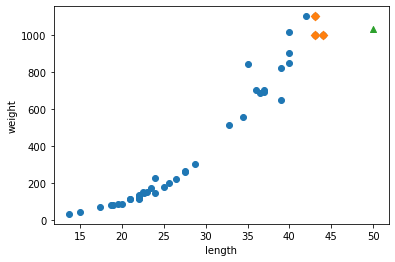

In [20]:
# 시각화
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

plt.scatter(50, 1033, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [22]:
print(knr.predict([[100]])) # 길이가 100인 농어도 무게를 1033으로 예측하네????

[1033.33333333]


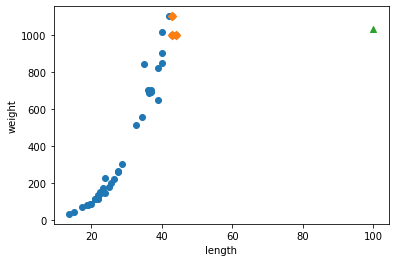

In [23]:
# 시각화
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

plt.scatter(100, 1033, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 농어가 아무리 커도 무게가 더 늘어나지 않네....

### 선형 회귀
- 선형 회귀(linear regression)은 널리 사용되는 대표적인 회귀 알고리즘이다.
- 선형 회귀는 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방적식을 찾습니다. 특성이 하나면 직선 방정식이다.

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
# k-최근접 이웃 회귀를 사용했을 때와 달리 선형 회귀는 50cm 농어의 무게를 아주 높게 예측

[1241.83860323]


In [25]:
# 선형회귀의 모델 파라미터 찾기
# k-최근접 이웃과다르게 모델 기반 학습을 한다
# 선형 회귀가 찾은 특성과 타깃 사이의 관꼐는 선형 방정식의 계수 또는 가중치에 저장된다.
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


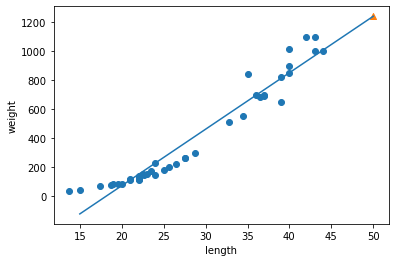

In [26]:
# 시각화
plt.scatter(train_input, train_target)

# 직선 그리기
plt.plot([15, 50], [15*lr.coef_ +lr.intercept_ , 50*lr.coef_ +lr.intercept_])

plt.scatter(50, 1241.8, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 직선이 0 이하로 쭉 내려가는 걸 확인... 흠... 뭐지?....

In [27]:
# R^2 확인하기
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 훈련 세트와 테스트 세트의 점수가 조금 차이나네??....
# 저자는 과소적합되었다고 판단...

0.9398463339976041
0.824750312331356


### 다항 회귀
- 다항식을 사용한 선형 회귀를 다항 회귀라고 부릅니다.
- 이 함수는 비선형일수 있지만 여전히 선형 회귀로 표현할 수 있다.

In [28]:
# 위 그림에서 현재 데이터는 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가깝다. 이런 2차 방정식의 그래프를 그려보자...
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [29]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [30]:
# 다시 재학습
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [31]:
# 회귀 계수 확인
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


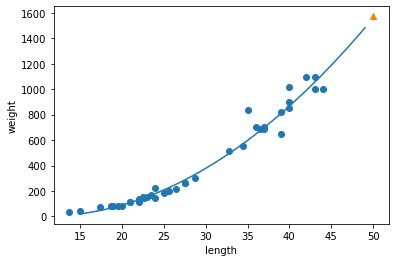

In [32]:
# 시각화
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6 *point +116.05)

plt.scatter(50, 1574, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 앞선 단순 선형 회귀 모델보다 훨씬 나은 그래프가 그려진 것을 확인...
# 선형 회귀로 훈련 세트 범위 밖의 샘플을 예측할 수 있다.

In [33]:
# R^2 확인하기
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 여전히 훈련세트의 점수가 더 높네... 어떡하지...?...;;

0.9706807451768623
0.9775935108325122


### 키워드로 끝내는 핵심 포인트
- 모델 파라미터는 선형 회귀가 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터를 말합니다.

### 핵심 패키지와 함수
#### sikit-learn
- LinearRegression은 사이킷런의 선형 회귀 클래스입니다.
    - fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않습니다. 이 매개변수의 기본값은 True입니다.
    - coef_ 속성은 특성에 대한 계수를 포함한 배열입니다.
    - intercept_ 속성에는 절편이 저장되어 있다.

# 03-3 특성 공학과 규제
- 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀를 배웁니다.
- 특성공학은 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 말합니다.

### 다중 회귀
- 다중 회귀는 여러 개의 특성을 사용한 선형 회귀를 망합니다.

### 데이터 준비
- 판다스(pandas)는 데이터 분석 라이브러리입니다.
- 데이터프레임(dataframe)은 판단스의 핵심 데이터 구조입니다.

In [34]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:5]) # length, height, width

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


- http://bit.ly/perch_data

In [35]:
# target data
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [36]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state= 42)

### 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공합니다. 이런 클래스를 변환기(transformer)라고 부릅니다.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [39]:
poly = PolynomialFeatures(include_bias = False) # 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 특성 만들 필요 없다
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [40]:
poly = PolynomialFeatures(include_bias=False )
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [41]:
# 어떤 입력의 조합으로 만들어졌는지 확인
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [42]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [44]:
print(lr.score(train_poly, train_target))

0.9903183436982126


In [45]:
print(lr.score(test_poly, test_target))
# 특성을 추가하니 과소적합 문제가 해결되네?? 그럼 더더더더더더 많이 하면 어떨까??

0.9714559911594202


In [46]:
# 5제곱까지 특성을 출력
poly = PolynomialFeatures(degree =5, include_bias= False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 55개까지 특성이 만들어진것을 확인

(42, 55)


In [47]:
# 재학습
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999997528

In [48]:
print(lr.score(test_poly, test_target))
# 특성을 마냥 높인다고해서 좋은건 아니네???...
# 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수가 나온다.. ㅠㅠ

-144.4056443626144


### 규제
- 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말합니다.
- 일반적으로 선형 회귀 모델에 규제를 적용할때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다. 규제를 적용하기 위해 정규화를 해야한다.

In [49]:
# 이전처럼 직접 정규화하지않고 StandardScaler 클래스를 사용!!
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야한다.

### 릿지 회귀
- 릿지(ridge)는 계수를 제곱한 값을 기준으로 규제를 적용한다.

In [50]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037344


In [51]:
print(ridge.score(test_scaled, test_target))
# 확실히 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있다.

0.9790693977615385


In [52]:
# alpha 값은 모델이 학습하는 값이 아니라 서전에 우리가 지정해야 하는 값으로 머신러닝 모델이 학습할 수 없고 
# 사람이 알려줘야 하는 파라미터를 하이퍼파라미터(hyperparameter)라고 부른다.
# alpha 값에 따른 점수 확인

In [53]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [54]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 점수를 확인
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

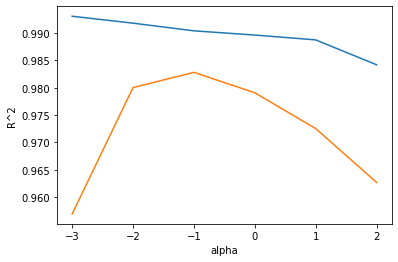

In [55]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# alpha가 -1 즉, 10^-1 =0.1 일때 가장 좋다.

In [56]:
# alpha = 0.1 로 다시 학습
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 훈련세트 테스트 세트 모두 비슷하고 과적합이 없이 균형이군.. ㅎㅎ

0.9903815817570369
0.9827976465387019


### 라쏘 회귀
- 라쏘(lasso)는 계수의 절댓값을 기준으로 규제를 적용한다.
- 리지, 라쏘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [58]:
print(lasso.score(test_scaled, test_target))
# 라쏘도 릿지만큼 성능이 좋다.

0.9800593698421883


In [59]:
# alpha 규제
train_score = []
test_score = []
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # max_iter이 작으면 지정한 반복 횟수가 부족할때 경고가 뜬다. ConvergenceWarning
    # 경고가 안뜰떄까지 하는게 좋은걸가???
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19432.21146809597, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19372.641089924553, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

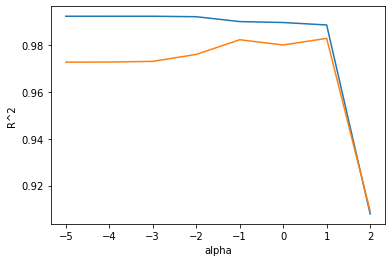

In [60]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# alpha 값은 1, 즉 10일때 서능이 좋네??

In [61]:
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
# 리지처럼 라소도 굿굿

0.9888067471131867
0.9824470598706695


In [62]:
# 회귀계수가 0으로 수렴한 특성이 40개
# 이 특징을 이용하여 라쏘 모델을 유용한 특성을 골라내는 용도로 사용하기도 한다.
print(np.sum(lasso.coef_== 0))

40


In [64]:
lasso.coef_, lasso.intercept_

(array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
        42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
        43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
         0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
         0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 400.8333333333333)

### 핵심 패키지와 함수

#### pandas
- read_csv()는 CSV 파일을 읽어 판다스 데이터프레임으로 변환하는 함수입니다.
    - sep는 CSV 파일의 구분자를 지정한다. 기본값은 콤마(,)이다.
    - header에 데이터프레임의 열 이름으로 사용할 CSV파일의 행 번호를 지정, 기본적으로 첫 번째 행을 열 이름으로 사용한다.
    - skiprows는 파일에서 읽기 전에 건너뛸 행의 개수를 지정한다.
    - nrows는 파일에서 읽을 행의 개수를 지정한다.

#### scikit-learn
- PolynomialFeatures는 주어진 특성을 조합하여 새로운 특성을 만듭니다.
    - degree는 최고 차수를 지정합니다. 기본값은 2다.
    - interaction_only가 True이면 거듭제곱 항은 제외되고 특성 간의 곱셈 항만 추가한다. 기본값은 Fale이다.
    - include_bias는 False이면 절편을 위한 특성을 추가하지 않는다. 기본값은 True이다.
- Ridge는 규제가 있는 회귀 알고리즘인 릿지 회귀 모델을 훈련한다.
    - alpha 매개변수로 규제의 강도를 조절한다. alpha 값이 클수록 규제가 세지고 기본값은 1이다.
    - solver 매개변수에 최적의 모델을 찾기 위한 방법을 지정한다. 기본값은 'auto'이며 데이터에 따라 자동으로 선택한다. 'sag'는 확률적 평균 경사하강법 알고리즘으로 특성과 샘플 수가 많을 때에 성능이 빠르고 좋다. 'sag'의 개선 버전인 'saga'가 추가되었다.
    - random_state는 solver가 'sag'나 'saga'일 때 넘파이 난수 시드값을 지정할 수 있다.
- Lasso는 규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련한다. 이 클래스는 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행헤가는 좌표 하강법을 사용한다.
    - alphs와 random_state 매개변수는 Ridge 클래스와 동일하다
    - max_iter는 알고리즘의 수행 반복 횟수를 지정한다. 기본값은 1000이다.